In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [5]:
trainArr = np.loadtxt('optdigits.tra', delimiter = ',')
testArr = np.loadtxt('optdigits.tes', delimiter = ',')

In [6]:
def pMetric(a,b, p = 2):
    
    sumVal = 0
    
    for index, value in enumerate(a):
        
        sumVal += abs(a[index]-b[index])**p
        
    distance = sumVal**(1/p)
    
    return distance

def calcDist(dataA, dataB, metric = pMetric, p = 2):
    
    pointA = dataA[:-1]
    pointB = dataB[:-1]
    distance = metric(pointA, pointB, p)
    
    return distance

def k_NN(trainArr, testArr, kList = [3], metric = pMetric, p =2):
    
    classificationDct = {}
    i = 0

    for testPoint in testArr:
        
        distances = []

        for trainingPoint in trainArr:

            distances.append(calcDist(testPoint,trainingPoint, metric, p))

        sortedList = np.argsort(distances) #sorts in ascending order
        
        for k in kList:
            
            counts = np.zeros(10)
            
            kNN = sortedList[:k]

            for index in kNN:
                NNClassification = int(trainArr[index,-1])
                counts[NNClassification] +=1
            
            try:
                classificationDct[k].append(np.argmax(counts))
            except KeyError:
                classificationDct[k] = [np.argmax(counts)]

        if i%100 == 0 and i!=0:
            print("We are {}% done.".format(round(100*(i/len(testArr)),2)))
        i+=1
    
    return classificationDct

def assessModel(filename, testArr, verbose = True):
    
    with open (filename, 'rb') as fp:
        classificationList = pickle.load(fp)

    score = 0
    indexFailures = []

    for index, classification in enumerate(classificationList):
    
        if int(testArr[index,-1]) == classification:
            score+= 1
        else:
            indexFailures.append(index)
            
    percScore = round(100*(score/len(testArr)),2)
    
    if verbose:
        print("This model scored {}% !".format(percScore))
    
    return classificationList, indexFailures, percScore 
    

def plotBitMap(point, prediction, groundTruth):
    
    bitMap = np.array(point[:-1])
    plt.imshow(bitMap.reshape(8,8),vmin = 0,vmax = 16 ,cmap='gray_r')
    plt.title("Prediction: {}        Ground Truth : {}".format(prediction, groundTruth))
    
def genPlots(classificationList, indexFailures, testArr):
    fig = plt.figure()
    fig.set_figheight(12)
    fig.set_figwidth(12)
    print("Showing the first 9 of {} model errors".format(len(indexFailures)))
    for plotNum, index in enumerate(indexFailures[:9]):

        ax = fig.add_subplot(3,3,plotNum+1)
        plotBitMap(testArr[index],classificationList[index], int(testArr[index,-1]) )

    plt.show()

In [35]:
classificationList = k_NN(trainArr,testArr)

with open('3NN_euc.p', 'wb') as fp:
    pickle.dump(classificationList, fp)

We are 5.56% done.
We are 11.13% done.
We are 16.69% done.
We are 22.26% done.
We are 27.82% done.
We are 33.39% done.
We are 38.95% done.
We are 44.52% done.
We are 50.08% done.
We are 55.65% done.
We are 61.21% done.
We are 66.78% done.
We are 72.34% done.
We are 77.91% done.
We are 83.47% done.
We are 89.04% done.
We are 94.6% done.


In [86]:
classificationList, indexFailures, _ = assessModel('3NN_euc.p', testArr)

This model scored 97.83% !


Showing the first 9 of 39 model errors


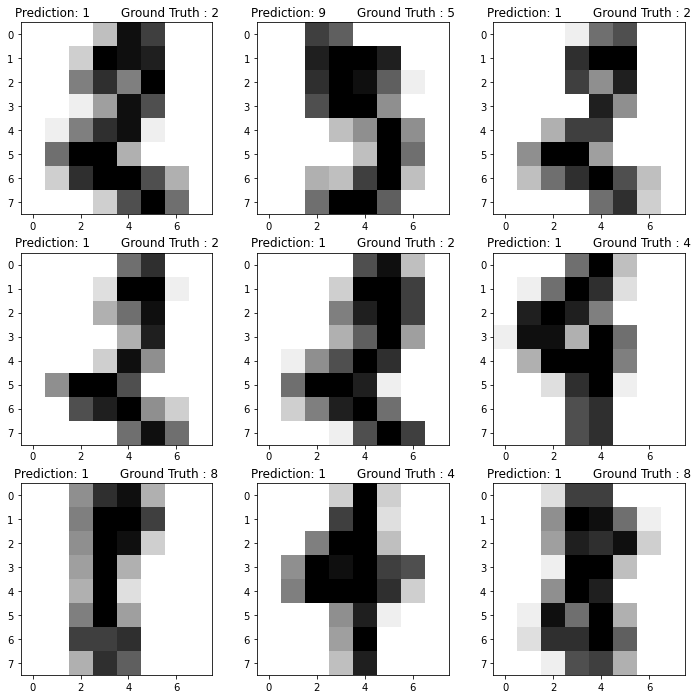

In [87]:
genPlots(classificationList, indexFailures, testArr)

In [92]:
classificationList = k_NN(trainArr, testArr, k =1, metric = pMetric, p =1)

with open('1NN_man.p', 'wb') as fp:
    pickle.dump(classificationList, fp)

We are 5.56% done.
We are 11.13% done.
We are 16.69% done.
We are 22.26% done.
We are 27.82% done.
We are 33.39% done.
We are 38.95% done.
We are 44.52% done.
We are 50.08% done.
We are 55.65% done.
We are 61.21% done.
We are 66.78% done.
We are 72.34% done.
We are 77.91% done.
We are 83.47% done.
We are 89.04% done.
We are 94.6% done.


In [95]:
classificationList, indexFailures, _ = assessModel('1NN_man.p', testArr)

This model scored 97.5% !


Showing the first 9 of 45 model errors


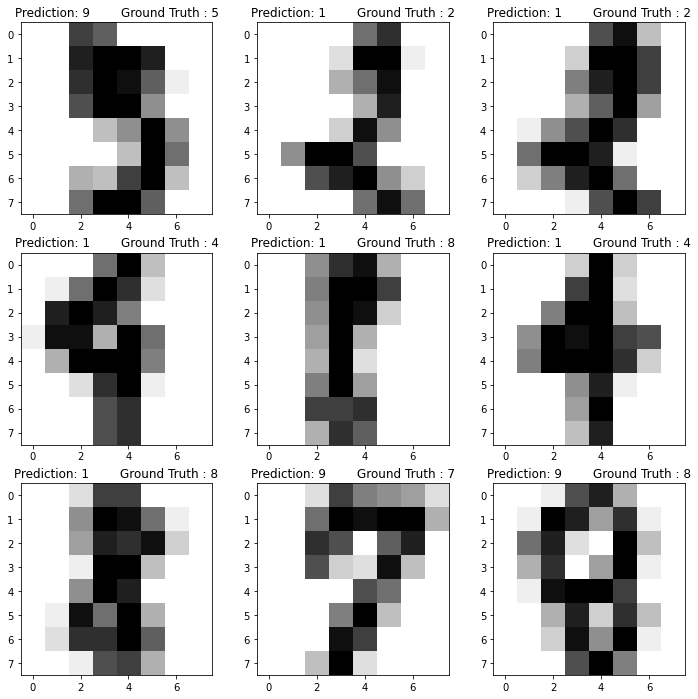

In [96]:
genPlots(classificationList, indexFailures, testArr)

In [134]:
pList = [0.5,1,2,4,10]
kList = [1,2,3,4,5,7,9]

for p_val in pList:
    
    classificationDct = k_NN(trainArr, testArr, kList, metric = pMetric, p = p_val)
    
    for k in kList:
        
        filename = str(k) + 'NN_' + str(p_val).replace(".", "") + 'p.p'
        
        with open(filename, 'wb') as fp:
            pickle.dump(classificationDct[k], fp)
        
        print("Succesfully wrote classificationDct to {}.".format(filename))

KeyboardInterrupt: 

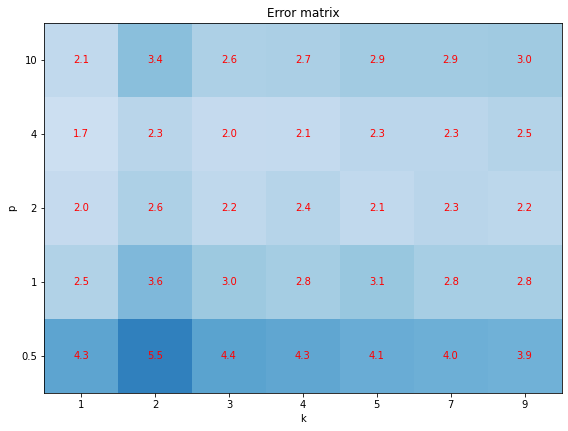

In [28]:
pList = [0.5,1,2,4,10]
kList = [1,2,3,4,5,7,9]

flippedpList = pList.copy()
flippedpList.reverse()
errorMatrix = np.zeros((len(pList),len(kList)))

fig, ax = plt.subplots()        

for i, p_val in enumerate(flippedpList):
    for j, k in enumerate(kList):
        
        filename = str(k) + 'NN_' + str(p_val).replace(".", "") + 'p.p'
        
        classificationList, indexFailures, percScore = assessModel(filename, testArr, verbose = False)
        
        errorMatrix[i,j] = 100 - percScore
        
        text = ax.text(j, i, round(errorMatrix[i, j],1),
               ha="center", va="center", color="r")
        
ax.imshow(errorMatrix, cmap = 'Blues', vmin = 0, vmax = 8)    

# We want to show all ticks...
ax.set_xticks(np.arange(len(kList)))
ax.set_yticks(np.arange(len(pList)))
# ... and label them with the respective list entries
ax.set_xticklabels(kList)
ax.set_yticklabels(flippedpList)
ax.set_ylabel("p")
ax.set_xlabel("k")

fig.set_figheight(8)
fig.set_figwidth(8)

ax.set_title("Error matrix")
fig.tight_layout()
plt.show()